In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#  using yfinance library to download stocks dataset

import yfinance as yf

ss = yf.Ticker("AAPL")

In [3]:
ss.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [4]:
hist = ss.history(period="max")

In [5]:
csv_data = hist.to_csv("apple.csv")

In [6]:
# We are reading CSV file

In [7]:
df =pd.read_csv('apple.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10379 entries, 0 to 10378
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10379 non-null  object 
 1   Open          10379 non-null  float64
 2   High          10379 non-null  float64
 3   Low           10379 non-null  float64
 4   Close         10379 non-null  float64
 5   Volume        10379 non-null  int64  
 6   Dividends     10379 non-null  float64
 7   Stock Splits  10379 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 648.8+ KB


In [9]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.100326,0.100762,0.100326,0.100326,469033600,0.00,0.0
1,1980-12-15,0.095528,0.095528,0.095092,0.095092,175884800,0.00,0.0
2,1980-12-16,0.088548,0.088548,0.088112,0.088112,105728000,0.00,0.0
3,1980-12-17,0.090293,0.090729,0.090293,0.090293,86441600,0.00,0.0
4,1980-12-18,0.092911,0.093347,0.092911,0.092911,73449600,0.00,0.0
...,...,...,...,...,...,...,...,...
10374,2022-02-03,174.257984,176.015754,171.900986,172.679993,89418100,0.00,0.0
10375,2022-02-04,171.679993,174.100006,170.679993,172.389999,82391400,0.22,0.0
10376,2022-02-07,172.860001,173.949997,170.949997,171.660004,77251200,0.00,0.0
10377,2022-02-08,171.729996,175.350006,171.429993,174.830002,74829200,0.00,0.0


lets understand what are these columns all about? 

1. open  - It is the price at which the financial security opens in the market when trading begins
2. High - The high is the highest price at which a stock traded during a period.
3. low -  lowest price at which a stock traded during period
4. close - The closing price is the last price at which a security traded during the regular trading day.
5. volumne - Volume is the number of shares of a security traded during a given period of time.
6. Dividents - Dividend refers to a reward, cash or otherwise, that a company gives to its shareholders.
6. stock splits - A stock split is a decision by a company's board of directors to increase the number of shares outstanding by issuing more shares to current shareholders

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

Removing all the unnecessary columns we are only focusing on open and Close price 

In [11]:
df.drop(['High','Low','Volume','Dividends','Stock Splits'],axis=1,inplace=True)

In [12]:
df

,Date,Open,Close
0,1980-12-12,0.100326,0.100326
1,1980-12-15,0.095528,0.095092
2,1980-12-16,0.088548,0.088112
3,1980-12-17,0.090293,0.090293
4,1980-12-18,0.092911,0.092911
...,...,...,...
10374,2022-02-03,174.257984,172.679993
10375,2022-02-04,171.679993,172.389999
10376,2022-02-07,172.860001,171.660004
10377,2022-02-08,171.729996,174.830002


In [13]:
df['Date'] = df['Date'].astype("datetime64")

In [14]:
df = df.set_index("Date")

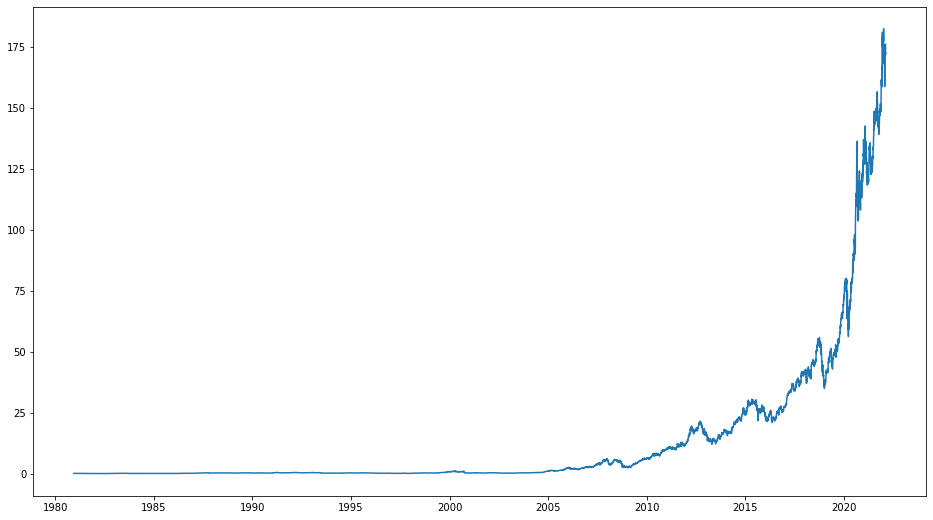

In [15]:
plt.figure(figsize=(16,9))
plt.plot(df['Open'])
plt.show()

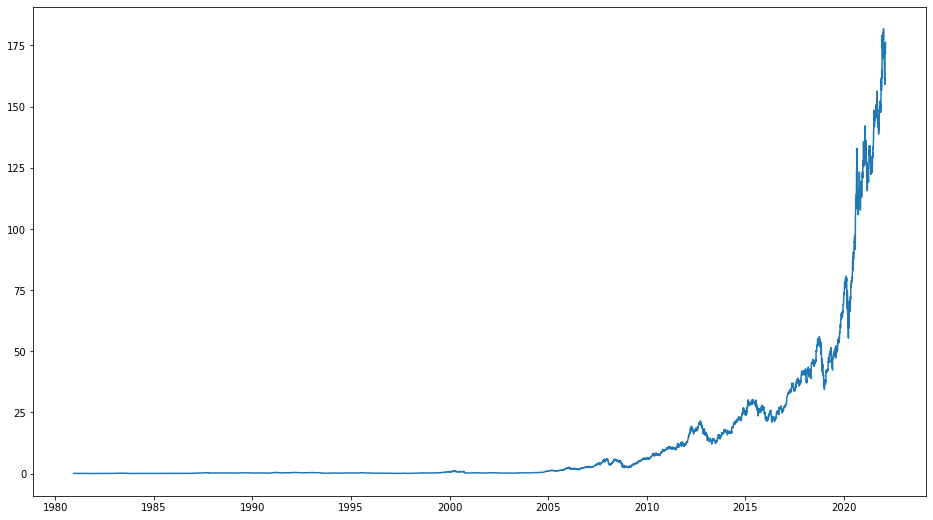

In [16]:
plt.figure(figsize=(16,9))
plt.plot(df['Close'])
plt.show()

Data Preprocessing steps

We must pre-process this data before applying stock price using LSTM. 

In [17]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [18]:
df[df.columns] = ms.fit_transform(df)

In [19]:
df

,Open,Close
Date,,
1980-12-12,0.000337,0.000341
1980-12-15,0.000311,0.000312
1980-12-16,0.000273,0.000274
1980-12-17,0.000282,0.000286
1980-12-18,0.000297,0.000300
...,...,...
2022-02-03,0.955365,0.949937
2022-02-04,0.941228,0.948342
2022-02-07,0.947699,0.944325


In [20]:
training_size = round(len(df) * 0.8)

In [21]:
training_set = df[:training_size]

In [22]:
training_set.shape

(8303, 2)

In [23]:
testing_set = df[training_size:]

In [24]:
testing_set.shape

(2076, 2)

In [25]:
print(f"my training set = {training_set.shape} and testing set is {testing_set.shape}")

my training set = (8303, 2) and testing set is (2076, 2)


In [26]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [27]:
train_seq, train_label = create_sequence(training_set)
test_seq, test_label = create_sequence(testing_set)

In [28]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((8253, 50, 2), (8253, 2), (2026, 50, 2), (2026, 2))

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
custom_early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    min_delta=0.001, 
    mode='max'
)

In [31]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(train_seq, train_label, epochs=200,validation_data=(test_seq, test_label), verbose=1, callbacks=[custom_early_stopping] )

Epoch 1/200
258/258 [==============================] - 6s 16ms/step - loss: 2.1606e-05 - mean_absolute_error: 0.0019 - val_loss: 0.0022 - val_mean_absolute_error: 0.0240
Epoch 2/200
258/258 [==============================] - 4s 15ms/step - loss: 2.5907e-06 - mean_absolute_error: 9.8498e-04 - val_loss: 0.0027 - val_mean_absolute_error: 0.0275
Epoch 3/200
258/258 [==============================] - 4s 14ms/step - loss: 2.3413e-06 - mean_absolute_error: 9.6497e-04 - val_loss: 0.0029 - val_mean_absolute_error: 0.0310
Epoch 4/200
258/258 [==============================] - 4s 15ms/step - loss: 2.7047e-06 - mean_absolute_error: 0.0010 - val_loss: 0.0020 - val_mean_absolute_error: 0.0229
Epoch 5/200
258/258 [==============================] - 4s 16ms/step - loss: 2.0663e-06 - mean_absolute_error: 9.0994e-04 - val_loss: 0.0013 - val_mean_absolute_error: 0.0185
Epoch 6/200
258/258 [==============================] - 4s 16ms/step - loss: 2.1872e-06 - mean_absolute_error: 9.2533e-04 - val_loss: 0.001

In [33]:
test_predicted = model.predict(test_seq)
test_predicted

array([[0.09586771, 0.09611347],
       [0.09602201, 0.0962699 ],
       [0.09564434, 0.09582458],
       ...,
       [0.787159  , 0.8234078 ],
       [0.79076916, 0.8271582 ],
       [0.7938115 , 0.8305175 ]], dtype=float32)

In [34]:
test_inverse_predicted = ms.inverse_transform(test_predicted) # Inversing scaling on predicted data


In [35]:
test_inverse_predicted

array([[ 17.521141,  17.506048],
       [ 17.54928 ,  17.534477],
       [ 17.48041 ,  17.453547],
       ...,
       [143.5842  , 149.68454 ],
       [144.24254 , 150.36613 ],
       [144.79733 , 150.97664 ]], dtype=float32)

In [36]:
gs_slic_data = pd.concat([df.iloc[-2026:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=df.iloc[-2026:].index)], axis=1)

In [37]:
gs_slic_data 

,Open,Close,open_predicted,close_predicted
Date,,,,
2014-01-27,0.095190,0.095591,17.521141,17.506048
2014-01-28,0.088025,0.087934,17.549280,17.534477
2014-01-29,0.087191,0.086933,17.480410,17.453547
2014-01-30,0.086946,0.086765,17.339098,17.295584
2014-01-31,0.085670,0.086907,17.156406,17.097397
...,...,...,...,...
2022-02-03,0.955365,0.949937,141.911560,147.865555
2022-02-04,0.941228,0.948342,142.812241,148.853317
2022-02-07,0.947699,0.944325,143.584198,149.684540


In [38]:
gs_slic_data[['Open','Close']] = ms.inverse_transform(gs_slic_data[['Open','Close']])

In [39]:
gs_slic_data

,Open,Close,open_predicted,close_predicted
Date,,,,
2014-01-27,17.397540,17.411139,17.521141,17.506048
2014-01-28,16.090986,16.019508,17.549280,17.534477
2014-01-29,15.938858,15.837648,17.480410,17.453547
2014-01-30,15.894263,15.806970,17.339098,17.295584
2014-01-31,15.661485,15.832908,17.156406,17.097397
...,...,...,...,...
2022-02-03,174.257984,172.679993,141.911560,147.865555
2022-02-04,171.679993,172.389999,142.812241,148.853317
2022-02-07,172.860001,171.660004,143.584198,149.684540


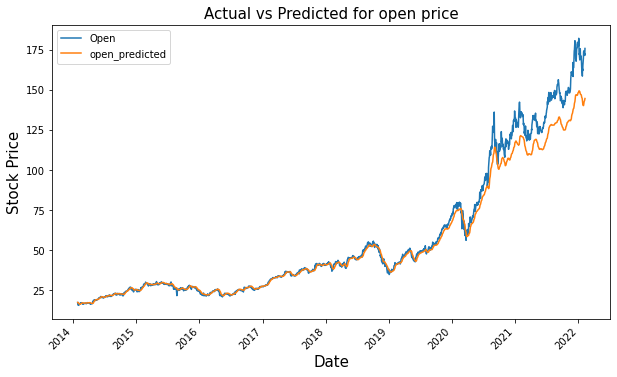

In [40]:
gs_slic_data[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

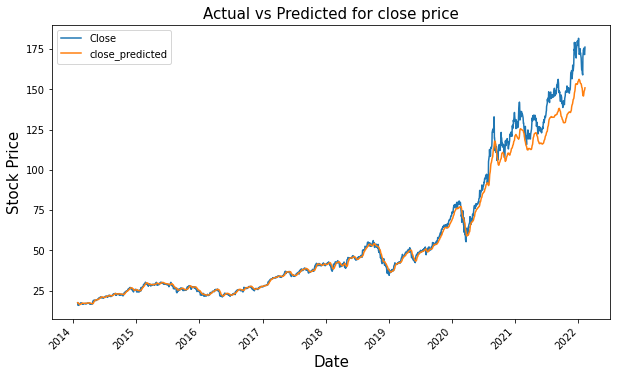

In [41]:
gs_slic_data[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()